In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv('E:\\MS_2nd Semester\\dataset\\NLP\\Language identification dataset\\Language detection.csv')

In [3]:
df.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [4]:
df.shape

(10337, 2)

In [6]:
df.Language.value_counts()

English       1385
French         750
Portugeese     739
Malayalam      594
Tamil          469
Hindi           63
Name: Language, dtype: int64

In [7]:
df['Text']

0        Nature, in the broadest sense, is the natural...
1       "Nature" can refer to the phenomena of the phy...
2       The study of nature is a large, if not the onl...
3       Although humans are part of nature, human acti...
4       [1] The word nature is borrowed from the Old F...
                              ...                        
3995                   je vous remercie pour vos efforts.
3996    non merci de toute façon, et une autre phrase ...
3997                  je demande et puis je dis à la fin.
3998    merci d'avance, ce qui signifie que j'espère v...
3999               faites-le en vous remerciant d'avance.
Name: Text, Length: 4000, dtype: object

In [8]:
df.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [9]:
for index,entry in enumerate(df['Text']):
    print(index,entry)

0  Nature, in the broadest sense, is the natural, physical, material world or universe.
1 "Nature" can refer to the phenomena of the physical world, and also to life in general.
2 The study of nature is a large, if not the only, part of science.
3 Although humans are part of nature, human activity is often understood as a separate category from other natural phenomena.
4 [1] The word nature is borrowed from the Old French nature and is derived from the Latin word natura, or "essential qualities, innate disposition", and in ancient times, literally meant "birth".
5 [2] In ancient philosophy, natura is mostly used as the Latin translation of the Greek word physis (φύσις), which originally related to the intrinsic characteristics that plants, animals, and other features of the world develop of their own accord.
6 [3][4] 
The concept of nature as a whole, the physical universe, is one of several expansions of the original notion;[1] it began with certain core applications of the word φύσις

960 Given a set of training examples, each marked as belonging to one of two categories, an SVM training algorithm builds a model that predicts whether a new example falls into one category or the other.
961 [69]  An SVM training algorithm is a non-probabilistic, binary, linear classifier, although methods such as Platt scaling exist to use SVM in a probabilistic classification setting.
962 In addition to performing linear classification, SVMs can efficiently perform a non-linear classification using what is called the kernel trick, implicitly mapping their inputs into high-dimensional feature spaces.
963 Regression analysis encompasses a large variety of statistical methods to estimate the relationship between input variables and their associated features.
964 Its most common form is linear regression, where a single line is drawn to best fit the given data according to a mathematical criterion such as ordinary least squares.
965 The latter is often extended by regularization (mathema

1709 നിങ്ങൾ വീട്ടിലെത്തിയതായും നിങ്ങളുടെ എല്ലാ സുഹൃത്തുക്കളും നിങ്ങളുടെ കട്ടിലിൽ ഇരിക്കുന്നതായും ആശങ്കകളൊന്നുമില്ല.
1710 നിങ്ങൾ ഇവിടെ എന്താണ് ചെയ്യുന്നത് എന്നതുപോലെയാണ് നിങ്ങൾ ഇവിടെ നടക്കുന്നത്.
1711 നിങ്ങൾ‌ക്ക് എന്തെങ്കിലും പിടിച്ചില്ലെങ്കിൽ‌ അല്ലെങ്കിൽ‌ നിങ്ങൾ‌ക്ക് എല്ലായ്‌പ്പോഴും ചോദിക്കാൻ‌ കഴിയുന്ന വ്യക്തിയെ മനസ്സിലായില്ലെങ്കിൽ‌ ഞാൻ‌ നിങ്ങളെ ശരിയാക്കിയിട്ടുണ്ടോ?
1712 എന്നിട്ട് മുന്നോട്ട് പോയി നിങ്ങൾക്ക് എവിടെ നിന്ന് കിട്ടി എന്ന് വിശദീകരിക്കുക ഞാൻ നിങ്ങളെ ശരിയാക്കി?
1713 കരയരുതെന്ന് വിഷമിക്കേണ്ട എന്ന് നിങ്ങൾ ആരോടെങ്കിലും ചോദിച്ചാൽ അത് മനസിലാക്കരുത് എന്ന് പറയാം.
1714 ഗൗരവമായി കാണരുത് പോലെ വിഷമിക്കേണ്ട, അത് ഹൃദയത്തിലേക്ക് എടുക്കരുത്.
1715 ഒരു വാക്യത്തിന്റെ ഒരു ഭാഗം നിങ്ങൾക്ക് പിടിച്ചില്ലേ എന്ന് ചോദിക്കാനുള്ള മറ്റൊരു മാർഗ്ഗം, അവസാന വാക്ക് ഞാൻ പിടിച്ചില്ലെന്ന് നിങ്ങൾക്ക് പറയാൻ കഴിയും.
1716 എന്നോട് ക്ഷമിക്കൂ.
1717 ആരെങ്കിലും ഇത് മുഴുവൻ ആവർത്തിക്കണമെന്ന് ഞാൻ ആഗ്രഹിക്കുന്നുവെങ്കിൽ അവസാന വാക്ക് ഞാൻ പിടിക്കാത്തതിനാൽ നിങ്ങൾക്ക് ഇത് ആവർത്തിക്കാമോ?
1718 നിങ്ങൾക്ക് ക്ഷമിക്കണം എന്ന് പറയാൻ കഴിയും

2609 Finalmente, a Wikipédia não deve tomar partido.
2610 Todas as opiniões e pontos de vista, se imputáveis a fontes externas, deverão ser adequadamente cobertos pelo texto do artigo.
2611 [64] A Wikipédia tem muitos métodos de resolução de litígios.
2612 O ciclo "seja audaz, reverta, discuta" ocorre algumas vezes, quando um usuário faz uma edição, outro usuário reverte essa edição e o assunto é discutido na página de discussão apropriada.
2613 Com o fim de obter um consenso mais amplo da comunidade, as questões podem ser levantadas na "Esplanada" ou nos "Pedidos de opinião", locais em que é solicitada a participação de outros usuários na discussão.
2614 Existem fóruns especializados que centralizam as discussões de decisões específicas, como por exemplo, se um artigo deve ou não ser eliminado.
2615 A mediação é por vezes utilizada, embora tenha sido considerada por alguns wikipedistas inútil na resolução de disputas particularmente controversas.
2616 Análises estatísticas sugerem que

3672 Le premier wiki est créé en 1995 par Ward Cunningham, qui l'appelle WikiWikiWeb[ad].
3673 Un wiki est un site web dynamique, dont les visiteurs autorisés peuvent modifier les pages qu'ils lisent avec leur navigateur web.
3674 Sur Wikipédia, par exemple, la syntaxe utilisée pour modifier une page est beaucoup plus simple que celle du Hypertext Markup Language, et elle est censée permettre un apprentissage rapide.
3675 Le fonctionnement de Wikipédia est assuré par le logiciel libre MediaWiki, une plate-forme wiki adaptée à Wikipédia, écrite en PHP et utilisant une base de données MySQL.
3676 MediaWiki est sous licence GNU GPL et est en 2010 utilisé par tous les projets Wikimedia ainsi que par de nombreux autres sites wikis.
3677 À l'origine, Wikipédia utilisait le logiciel UseModWiki, développé par Clifford Adams en Perl, et requérant l'usage de la camel case pour la création de liens entre les articles.
3678 À partir de janvier 2002, la version en anglais de Wikipédia utilise un lo

In [10]:
# for index,entry in enumerate(df['Text']):
#     # Declaring Empty List to store the words that follow the rules for this step
#     Final_words = []
#     # Initializing WordNetLemmatizer()
#     word_Lemmatized = WordNetLemmatizer()
#     # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
#     for word, tag in pos_tag(entry):
#         # Below condition is to check for Stop words and consider only alphabets
#         if word not in stopwords.words('english') and word.isalpha():
#             word_Final = word_Lemmatized.lemmatize(word)
#             Final_words.append(word_Final)
#     # The final processed set of words for each iteration will be stored in 'text_final'
#     df['Text'].loc[index] = str(Final_words)

In [11]:
X = df["Text"]
y = df["Language"]

In [12]:
import re
data_list = []
ind=0
for text in X:
    text = re.sub(r'[!@#$(),\n"%^*?\:;~`0-9]', ' ', text)
    text = re.sub(r'[[]]', ' ', text)
    text = text.lower()
    ind+=1
    data_list.append(text)
df['Text'].loc[ind] = str(data_list)

In [13]:
X

0        Nature, in the broadest sense, is the natural...
1       "Nature" can refer to the phenomena of the phy...
2       The study of nature is a large, if not the onl...
3       Although humans are part of nature, human acti...
4       [1] The word nature is borrowed from the Old F...
                              ...                        
3995                   je vous remercie pour vos efforts.
3996    non merci de toute façon, et une autre phrase ...
3997                  je demande et puis je dis à la fin.
3998    merci d'avance, ce qui signifie que j'espère v...
3999               faites-le en vous remerciant d'avance.
Name: Text, Length: 4000, dtype: object

In [15]:
# converting categorical variables to numerical

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(analyzer='word', ngram_range=(1,6),
                     min_df = 0, stop_words = 'english', sublinear_tf=True)
X =  tf.fit_transform(X)


In [17]:
X.shape

(4000, 281225)

In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [19]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [20]:
# prediction 
y_pred = model.predict(x_test)

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

C:\Users\HP\anaconda3\envs\gpu_test\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\envs\gpu_test\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\envs\gpu_test\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
print("Accuracy is :",ac)

Accuracy is : 0.92125


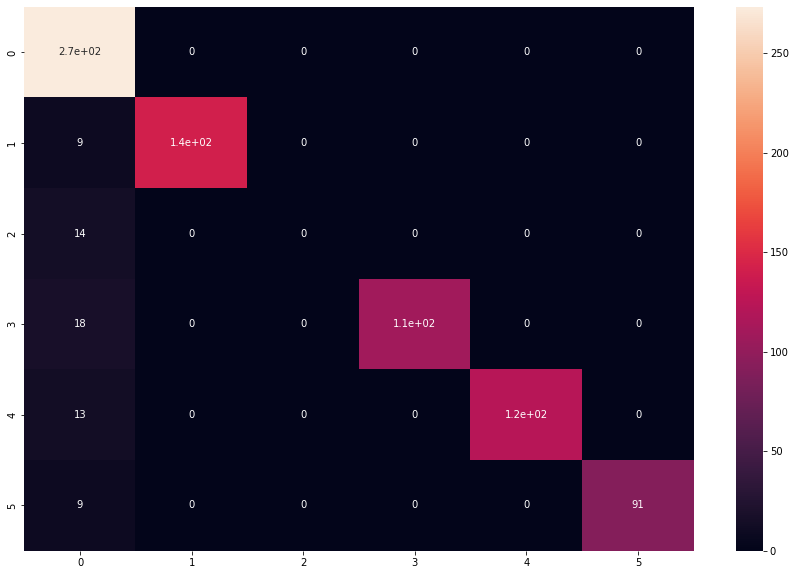

In [23]:
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

In [24]:
# classification report
print(cr)

              precision    recall  f1-score   support

           0       0.81      1.00      0.90       273
           1       1.00      0.94      0.97       150
           2       0.00      0.00      0.00        14
           3       1.00      0.86      0.92       127
           4       1.00      0.90      0.95       136
           5       1.00      0.91      0.95       100

    accuracy                           0.92       800
   macro avg       0.80      0.77      0.78       800
weighted avg       0.92      0.92      0.91       800

